### Imports

In [1]:
import importlib
import pandas as pd
import modules.data_processing
import seaborn as sns
import matplotlib.pyplot as plt
import string
from collections import Counter
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import ttest_ind

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [2]:
importlib.reload(modules.data_processing)
from modules.data_processing import *

### Wiki data

We extracted our wiki dataset for comparison with the other dataset.

In [3]:
DATA_PATH = './data/wiki-RfA.txt'
wiki_df = extract_data(DATA_PATH)
process_dataframe(wiki_df)

In [4]:
wiki_df.head(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID
0,Steel1943,BDD,1,1,2013,NaT,'''Support''' as co-nom.,1
1,Cuchullain,BDD,1,1,2013,NaT,'''Support''' as nominator.--,1
2,INeverCry,BDD,1,1,2013,NaT,'''Support''' per noms.,1
3,Cncmaster,BDD,1,1,2013,NaT,'''Support''' per noms. BDD is a strong contri...,1
4,Miniapolis,BDD,1,1,2013,NaT,"'''Support''', with great pleasure. I work wit...",1
5,Sven Manguard,BDD,1,1,2013,NaT,'''Support''' There are plenty of important ro...,1
6,Ramaksoud2000,BDD,1,1,2013,NaT,'''Support''' per noms. I don't see a reason n...,1
7,RockMagnetist,BDD,1,1,2013,NaT,'''Support''' BDD already wields a broom pret...,1
8,Carrite,BDD,1,1,2013,NaT,'''Support''' barring a completely unexpected ...,1
9,Someguy1221,BDD,1,1,2013,NaT,'''Support''' because I see no good reason not...,1


#### Text preprocessing

In [5]:
from modules.data_processing import *
importlib.reload(modules.data_processing)

wiki_copy = wiki_df.copy()
wiki_copy['TXT'] = wiki_copy['TXT'].astype(str)

wiki_copy['CLE'] = wiki_copy['TXT'].apply(remove_wiki_markup)
wiki_copy['CLE'] = wiki_copy['CLE'].apply(lambda x: '' if len(x) < 3 and x not in ['OK', 'No']  else x)


In [6]:
wiki_copy.head(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
0,Steel1943,BDD,1,1,2013,NaT,'''Support''' as co-nom.,1,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,NaT,'''Support''' as nominator.--,1,Support as nominator.
2,INeverCry,BDD,1,1,2013,NaT,'''Support''' per noms.,1,Support per noms.
3,Cncmaster,BDD,1,1,2013,NaT,'''Support''' per noms. BDD is a strong contri...,1,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,NaT,"'''Support''', with great pleasure. I work wit...",1,"Support, with great pleasure. I work with BDD ..."
5,Sven Manguard,BDD,1,1,2013,NaT,'''Support''' There are plenty of important ro...,1,Support There are plenty of important roles on...
6,Ramaksoud2000,BDD,1,1,2013,NaT,'''Support''' per noms. I don't see a reason n...,1,Support per noms. I don't see a reason not to.
7,RockMagnetist,BDD,1,1,2013,NaT,'''Support''' BDD already wields a broom pret...,1,Support BDD already wields a broom pretty wel...
8,Carrite,BDD,1,1,2013,NaT,'''Support''' barring a completely unexpected ...,1,Support barring a completely unexpected answer...
9,Someguy1221,BDD,1,1,2013,NaT,'''Support''' because I see no good reason not...,1,Support because I see no good reason not to.


### Creators data

Let's extract the creators dataset

In [7]:
DATA_PATH = './data/top_creators.txt'

# Ouvrir le fichier avec la fonction open
with open(DATA_PATH, 'r', encoding='utf-8') as data_file:
    lines = data_file.readlines()

data_lines = [line.strip() for line in lines if not line.startswith('|-')]
data_lines = [line[2:] for line in data_lines]

data_dict = defaultdict(list)

for i in range(3, len(data_lines), 3):
    data_dict[data_lines[0]].append(data_lines[i])
    data_dict[data_lines[1]].append(data_lines[i+1])
    data_dict[data_lines[2]].append(data_lines[i+2])

creators_df = pd.DataFrame(data_dict)
creators_df['USER'] = creators_df.apply(lambda row: row['USER'].split('|')[1] if '|' in row['USER'] else row['USER'], axis=1)
creators_df['USER'] = creators_df['USER'].str.rstrip("]]")

creators_df['NB_PAGES'] = creators_df['NB_PAGES'].astype(int)

In [8]:
creators_df.head(5)

,RANK,USER,NB_PAGES
0,1,Kotbot,55605
1,2,Dr. Blofeld,49089
2,3,Polbot,40174
3,4,Ram-Man,35076
4,5,AlbertHerring,14692


Let's incorporate the information we have regarding the number of pages created into our wiki dataset.

In [9]:
merged_df = pd.merge(creators_df, wiki_copy, left_on='USER', right_on='TGT', how='inner')

In [10]:
merged_df.head(5)

,RANK,USER,NB_PAGES,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
0,5,AlbertHerring,14692,Maximillion Pegasus,AlbertHerring,1,0,2008,NaT,'''Support''' I would like to see a little mor...,1021,Support I would like to see a little more Wiki...
1,5,AlbertHerring,14692,Basketball110,AlbertHerring,1,0,2008,NaT,'''Support''' as nom (shouldn't I be first to ...,1021,Support as nom (shouldn't I be first to suppor...
2,5,AlbertHerring,14692,Wisdom89,AlbertHerring,-1,0,2008,NaT,'''Oppose''' - I essentially knew how I was go...,1021,Oppose - I essentially knew how I was going to...
3,5,AlbertHerring,14692,Alanbly,AlbertHerring,-1,0,2008,NaT,'''Oppose''' - Proportionately miniscule use o...,1021,Oppose - Proportionately miniscule use of talk...
4,5,AlbertHerring,14692,Siva1979,AlbertHerring,-1,0,2008,NaT,'''Oppose''' per the above comments. --<font s...,1021,Oppose per the above comments.


Let's see how many candidates we have information about the number of pages created.

In [11]:
unique_candidate_df = wiki_copy.drop_duplicates(subset='TGT', keep='first')
unique_common_candidate_df = merged_df.drop_duplicates(subset='USER', keep='first')
print(f"Percentage of the wiki dataset explain by the creators dataset {round(100*len(unique_common_candidate_df)/len(unique_candidate_df),2)} %")

Percentage of the wiki dataset explain by the creators dataset 27.11 %


Now, we can create a box plot representing the distribution of the number of pages created based on the election result.

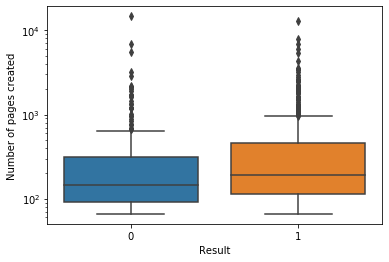

In [12]:
res_nb_pages = unique_common_candidate_df[['NB_PAGES','RES']]
plot = sns.boxplot(x="RES", y="NB_PAGES", data=res_nb_pages)
plt.xlabel("Result")
plt.ylabel("Number of pages created")
plt.yscale('log')

We can conduct a t-test to determine if there is a significant difference between the means of the rejected and accepted groups.

In [13]:
rejected = res_nb_pages[res_nb_pages['RES'] == 0]['NB_PAGES']
accepted = res_nb_pages[res_nb_pages['RES'] == 1]['NB_PAGES']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(rejected, accepted)

print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

P-value: 0.7588801182901398
There is no significant difference.


As indicated by the t-test, there is no significant difference. Therefore, we cannot conclude that creating more pages leads to a better chance of being elected.

### Editors data

Let's extract the editors dataset

In [14]:
DATA_PATH = './data/top_editors.txt'

# Ouvrir le fichier avec la fonction open
with open(DATA_PATH, 'r', encoding='utf-8') as data_file:
    lines = data_file.readlines()

data_lines = [line.strip() for line in lines if not line.startswith('|-')]
data_lines = [line[2:] for line in data_lines]

data_dict = defaultdict(list)

data_lines.insert(4003, 'NaN') # missing data correction

for i in range(4, len(data_lines), 4):
    data_dict[data_lines[0]].append(data_lines[i])
    data_dict[data_lines[1]].append(data_lines[i+1])
    data_dict[data_lines[2]].append(data_lines[i+2])
    data_dict[data_lines[3]].append(data_lines[i+3])


editors_df = pd.DataFrame(data_dict)
editors_df['USER'] = editors_df.apply(lambda row: row['USER'].split('|')[1] if '|' in row['USER'] else row['USER'], axis=1)
editors_df['USER'] = editors_df['USER'].str.rstrip("]]")

editors_df['NB_EDITS'] = editors_df['NB_EDITS'].apply(lambda x: str(x).replace(",", ""))
editors_df['NB_EDITS'] = editors_df['NB_EDITS'].astype(int)

In [15]:
editors_df.head(5)

,RANK,USER,NB_EDITS,CAT
0,1,Ser Amantio di Nicolao,5705768,"AP, Ad"
1,2,BrownHairedGirl,2942733,"AP, ECo, EM, F, N, Rv, Ro, TE"
2,3,Jevansen,2408733,"AP, ECo, EM, Rv, Ro"
3,4,BD2412,2262281,"AP, IP, Ad"
4,5,Koavf,2153268,"AP, ECo, EM, F, N, Rv, Ro, TE"


Let's incorporate the information we have regarding the number of edits made into our wiki dataset.

In [16]:
common_candidate_df = pd.merge(editors_df, wiki_copy, left_on='USER', right_on='TGT', how='inner')

In [17]:
common_candidate_df.head(5)

,RANK,USER,NB_EDITS,CAT,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
0,2,BrownHairedGirl,2942733,"AP, ECo, EM, F, N, Rv, Ro, TE",D-Day,BrownHairedGirl,1,1,2006,NaT,'''Support on WHEELS!!!''' Looks good to me! -...,2231,Support on WHEELS!!! Looks good to me! (
1,2,BrownHairedGirl,2942733,"AP, ECo, EM, F, N, Rv, Ro, TE",Rama's Arrow,BrownHairedGirl,1,1,2006,NaT,'''Support''' I find nothing wrong in self-nom...,2231,Support I find nothing wrong in self-nominatin...
2,2,BrownHairedGirl,2942733,"AP, ECo, EM, F, N, Rv, Ro, TE",Tone,BrownHairedGirl,1,1,2006,NaT,'''Support'''. Looks good to me also. --'''[[U...,2231,Support. Looks good to me also.
3,2,BrownHairedGirl,2942733,"AP, ECo, EM, F, N, Rv, Ro, TE",Lethe,BrownHairedGirl,1,1,2006,NaT,'''Support'''. I am a person who's not too ke...,2231,Support. I am a person who's not too keen on ...
4,2,BrownHairedGirl,2942733,"AP, ECo, EM, F, N, Rv, Ro, TE",Nephron,BrownHairedGirl,1,1,2006,NaT,'''Support'''. Looks alright. No sign that the...,2231,Support. Looks alright. No sign that they woul...


Let's see how many candidates we have information about the number of edits made.

In [18]:
unique_candidate_df = wiki_copy.drop_duplicates(subset='TGT', keep='first')
unique_common_candidate_df = common_candidate_df.drop_duplicates(subset='USER', keep='first')
print(f"Percentage of the wiki dataset explain by the editors dataset {round(100*len(unique_common_candidate_df)/len(unique_candidate_df),2)} %")

Percentage of the wiki dataset explain by the editors dataset 44.07 %


Now, we can create a box plot representing the distribution of the number of edits made based on the election result.

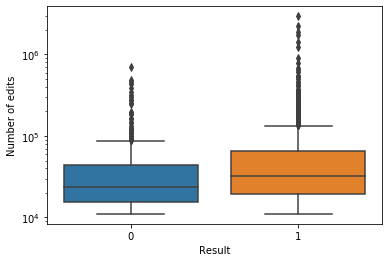

In [19]:
res_nb_edits = unique_common_candidate_df[['NB_EDITS','RES']]
plot = sns.boxplot(x="RES", y="NB_EDITS", data=res_nb_edits)
plt.xlabel("Result")
plt.ylabel("Number of edits")
plt.yscale('log')

We can conduct a t-test to determine if there is a significant difference between the means of the rejected and accepted groups.

In [20]:
rejected = res_nb_edits[res_nb_edits['RES'] == 0]['NB_EDITS']
accepted = res_nb_edits[res_nb_edits['RES'] == 1]['NB_EDITS']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(rejected, accepted)

print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

P-value: 0.021456774615374565
There is a significant difference.


As we can see, there is a significant difference, so we can conclude that making edits increases the chance of being elected.

### Authors data

Let's extract the authors dataset

In [21]:
DATA_PATH = './data/top_authors.txt'

# Ouvrir le fichier avec la fonction open
with open(DATA_PATH, 'r', encoding='utf-8') as data_file:
    lines = data_file.readlines()

data_lines = [line.strip() for line in lines if not line.startswith('|-')]
data_lines = [line[2:] for line in data_lines]

data_dict = defaultdict(list)

for i in range(3, len(data_lines), 3):
    data_dict[data_lines[0]].append(data_lines[i])
    data_dict[data_lines[1]].append(data_lines[i+1])
    data_dict[data_lines[2]].append(data_lines[i+2])

authors_df = pd.DataFrame(data_dict)
authors_df['USER'] = authors_df.apply(lambda row: row['USER'].split('|')[1] if '|' in row['USER'] else row['USER'], axis=1)
authors_df['USER'] = authors_df['USER'].str.rstrip("]]")

authors_df['NB_ARTICLES'] = authors_df.apply(lambda row: row['NB_ARTICLES'].split('|')[1] if '|' in row['NB_ARTICLES'] else row['NB_ARTICLES'], axis=1)
authors_df['NB_ARTICLES'] = authors_df['NB_ARTICLES'].str.rstrip("]}}")
authors_df['NB_ARTICLES'] = authors_df['NB_ARTICLES'].str.lstrip("[")

authors_df['RANK'] = authors_df['RANK'].apply(lambda x: str(x).replace("Top 100 Random Sort", "1"))
authors_df['NB_ARTICLES'] = authors_df['NB_ARTICLES'].apply(lambda x: str(x).replace("count protected", "4821"))
authors_df['NB_ARTICLES'] = authors_df['NB_ARTICLES'].apply(lambda x: str(x).replace(",", ""))
authors_df['NB_ARTICLES'] = authors_df['NB_ARTICLES'].astype(int)

In [22]:
authors_df.head(5)

,RANK,USER,NB_ARTICLES
0,1,Yankees10,4821
1,1,Davidlofgren1996,4821
2,1,Kwamikagami,4821
3,1,Number 57,4821
4,1,Philafrenzy,4821


Let's incorporate the information we have regarding the number of articles created into our wiki dataset.

In [23]:
merged_df = pd.merge(authors_df, wiki_copy, left_on='USER', right_on='TGT', how='inner')

In [24]:
merged_df.head(5)

,RANK,USER,NB_ARTICLES,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
0,1,Kwamikagami,4821,The Singing Badger,Kwamikagami,1,1,2005,NaT,,3209,
1,1,Kwamikagami,4821,Astrotrain,Kwamikagami,1,1,2005,NaT,Support,3209,Support
2,1,Kwamikagami,4821,Private Butcher,Kwamikagami,1,1,2005,NaT,"'''Support''', enough edits, and has been here...",3209,"Support, enough edits, and has been here for a..."
3,1,Kwamikagami,4821,JonMoore,Kwamikagami,1,1,2005,NaT,"'''Support'''. Kwamikagami is a great editor, ...",3209,"Support. Kwamikagami is a great editor, and th..."
4,1,Kwamikagami,4821,Ish ishwar,Kwamikagami,1,1,2005,NaT,"'''support''' - good phonetics, phonology, ext...",3209,"support - good phonetics, phonology, extra."


Let's see how many candidates we have information about the number of articles created.

In [25]:
unique_candidate_df = wiki_copy.drop_duplicates(subset='TGT', keep='first')
unique_common_candidate_df = merged_df.drop_duplicates(subset='USER', keep='first')
print(f"Percentage of the wiki dataset explain by the editors dataset {round(100*len(unique_common_candidate_df)/len(unique_candidate_df),2)} %")

Percentage of the wiki dataset explain by the editors dataset 29.6 %


Now, we can create a box plot representing the distribution of the number of articles created based on the election result.

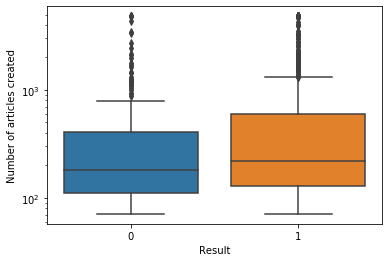

In [26]:
res_nb_articles = unique_common_candidate_df[['NB_ARTICLES','RES']]
plot = sns.boxplot(x="RES", y="NB_ARTICLES", data=res_nb_articles)
plt.xlabel("Result")
plt.ylabel("Number of articles created")
plt.yscale('log')

We can conduct a t-test to determine if there is a significant difference between the means of the rejected and accepted groups.

In [27]:
rejected = res_nb_articles[res_nb_articles['RES'] == 0]['NB_ARTICLES']
accepted = res_nb_articles[res_nb_articles['RES'] == 1]['NB_ARTICLES']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(rejected, accepted)

print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

P-value: 0.20299662389187162
There is no significant difference.


As indicated by the t-test, there is no significant difference. Therefore, we cannot conclude that creating more articles leads to a better chance of being elected.